In [1]:
%matplotlib inline

In [2]:
import stop_arrest_correlation_gis
import Time_StopNumber
import age_gender_searched as ags
import race_arrest_correlation as rap

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
from matplotlib import font_manager as fm

Processed 103051 lines.
23109 emty lines.


### Part 1: Vehicle stop and arrest per location

Here we will visualize the frequency of vehicle stops by region in San Diego. We use geopandas to process the geographical data and assign our arrest/stop information to the different areas in San Diego.

Our python file obtains the amount of stops and arrests for each police beat, and then assigns each beat to a county division. We then use darker colors to indicate a higher frequency and lighter colors to indicate lower frequencies.

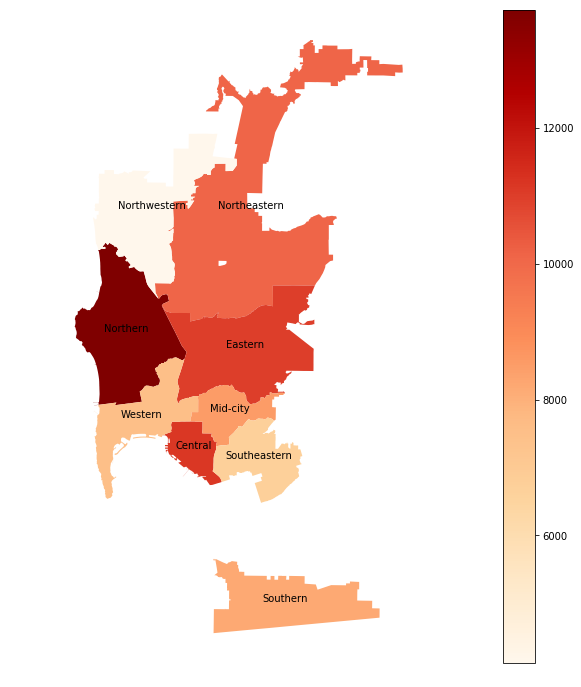

In [3]:
divsums_stop = stop_arrest_correlation_gis.create_stop_data()
stop_arrest_correlation_gis.plot_map(divsums_stop)

As evident by the map, the Northern section of San Diego contains a higher amount of vehicle stops. This could be caused by many different factors, such as a higher amount of traffic.

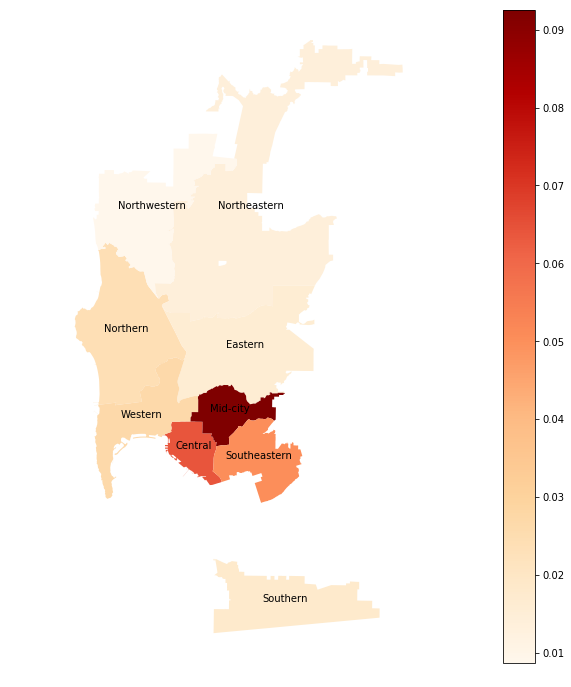

In [4]:
divsums_arrest = stop_arrest_correlation_gis.create_arrest_data()
stop_arrest_correlation_gis.plot_map(divsums_arrest)

Once we analize the **probability** of arrest given that the vehicle can be stopped, we see a radical shift in frequency. Mid-city San Diego has a much higher probability of arrest. According to the San Diego Union-Tribune, this area is one of the most ethnically diverse places in the country. Racial bias might be a component as to why this is happening.

### Part 2: Time and stop number

In this part, we will visualize the the result of vihecle stops as well as the relationship between time and number of stops. 

We first cleaned the original data and classified the results of stops into 7 classes. And then we used stacked bars plot to show how those stops distribute in the total number of stops To make the results distribution more clear, we utilized line plot to show the ratio each result takes up. 
For the time relationship, we took advantage of bars to clarify the relationship between week and number, month and number, time period and number.

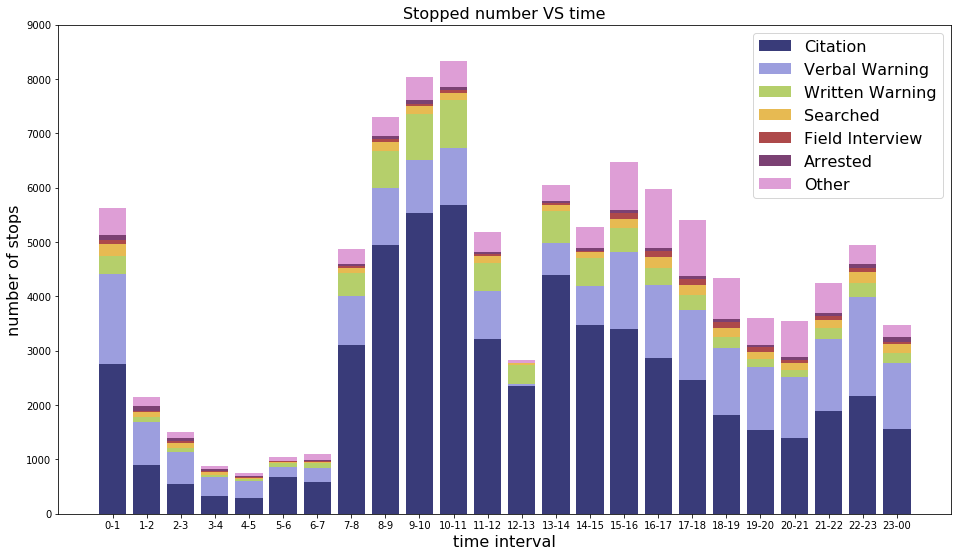

In [5]:
data = Time_StopNumber.TimeInterval_StopNumber()
Time_StopNumber.plot_TimeInterval_StopNumber(data)

As is shown in the picture, time period from **8:00-11:00** is the most likely time period to be stopped in a day. This may be due to the high volume of traffic of going to work.

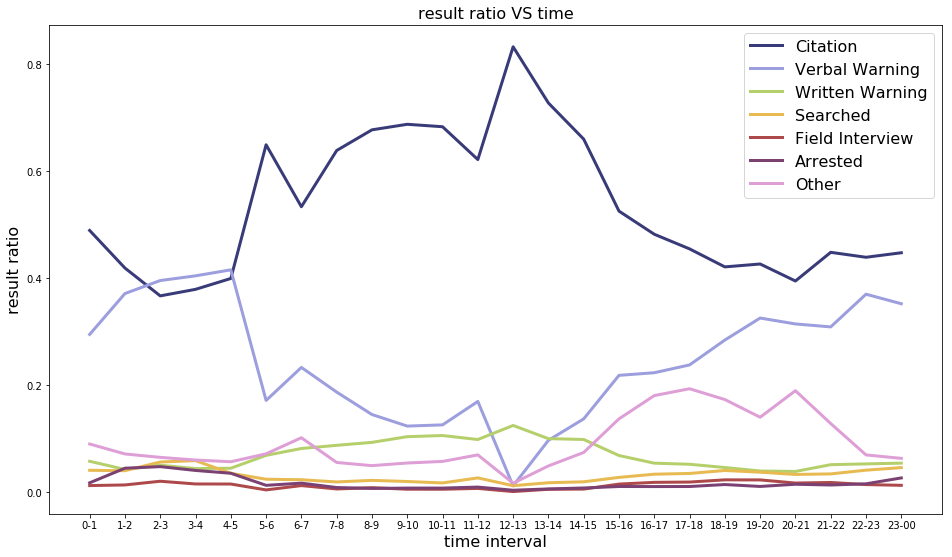

In [6]:
data_ratio = Time_StopNumber.TimeInterval_ResultRatio()
Time_StopNumber.plot_TimeInterval_ResultRatio(data_ratio)

The most common result is **Citation**, which ususlly takes more than 60 precents of stops per time interval. The second common result is **Verbal Waring**. Serious results ratio like **Searched, Arrested** is very low.

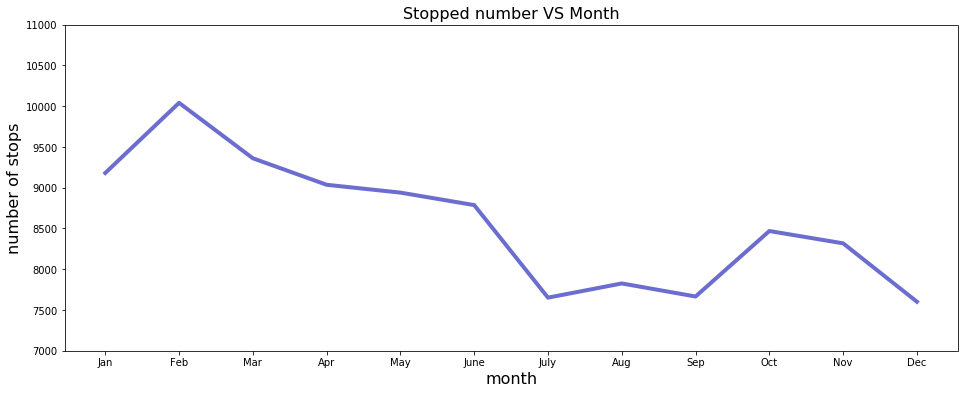

In [7]:
data = Time_StopNumber.month_StopNumber()
Time_StopNumber.plot_month_StopNumber(data)

As is show in the picture, there is no obvious stop number difference among months. **Febuary** is relatively higher than other months.

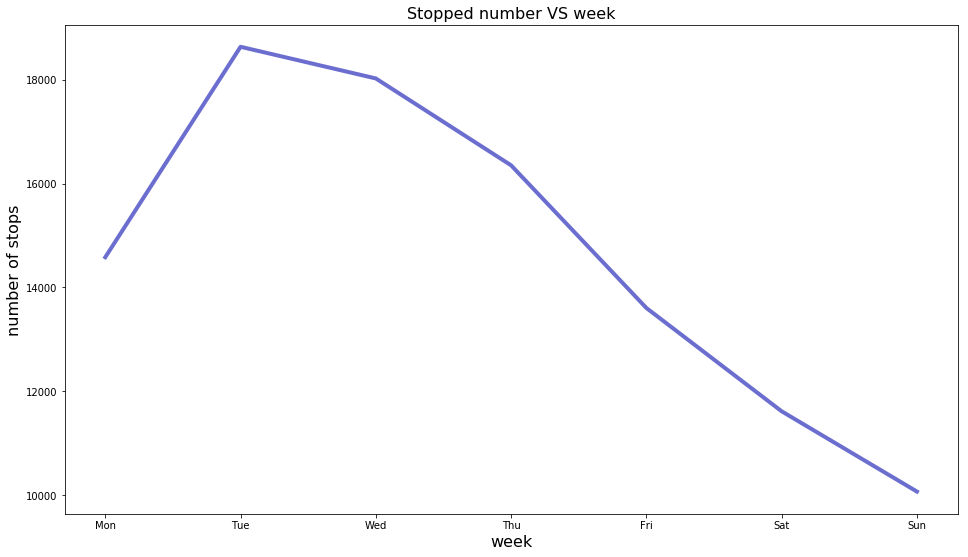

In [8]:
data = Time_StopNumber.week_StopNumber()
Time_StopNumber.plot_week_StopNumber(data)

This picture shows that stop number in **weekday** is **40%-80%** more than the stop number in **weekend**

### Part 3: Age, Gender and Searched Probability

Generally, in this part, we will focus on the correlation among age, gender and the probability of being searched when people are stopped.

- First obtained the clean dataset of three columns: *subject_sex*, *subject_age* and *searched*.
- Second draw the distribution of stop times in terms of age and gender.
- Third draw the distribution of searched times in terms of age and gender.
- Finally draw the distribution of searched probability if stopped by calculating the ratio of searched times to stopped times.


After cleaning dataset, we can draw the following pictures:

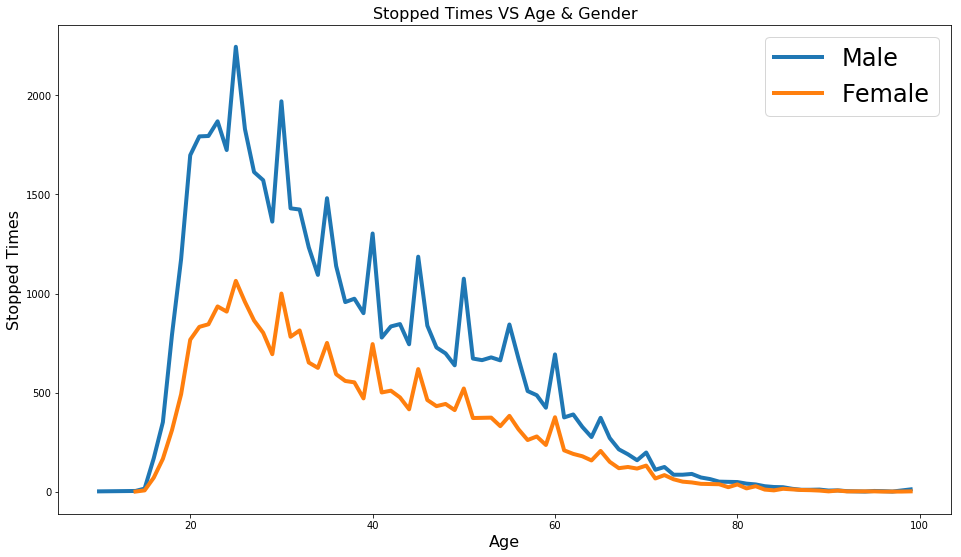

In [9]:
#Draw the distribution of stop times in terms of age and gender.
ags.plot('stopped')


As shown in the picture above, we can conclude that:
   - Male drivers are stopped more than female drivers.
   - Drivers of 20 ~ 40 year-old account for most stops

Followed by searched times:

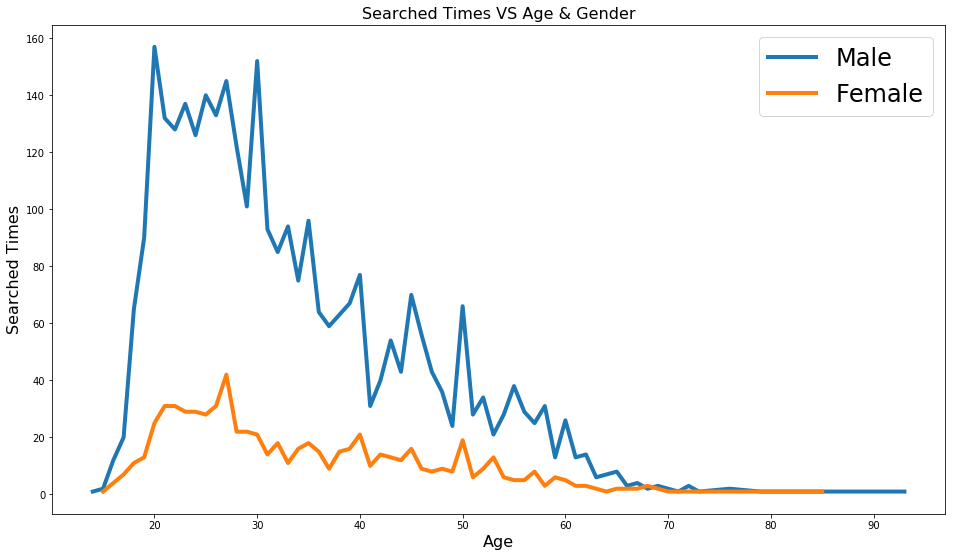

In [10]:
#Draw the distribution of searched times in terms of age and gender.
ags.plot('searched')

Similar things happened there, but:
  - The searched times line of female is much smoother than that of male
  - And the searched times of male are still higher than that of female

However searched times cannot help us to conclude you are more likely to be searched at what age or be man or be woman.
Therefore, we need to divide searched times by stopped times, so that we can find out the relation of those factors among one another.

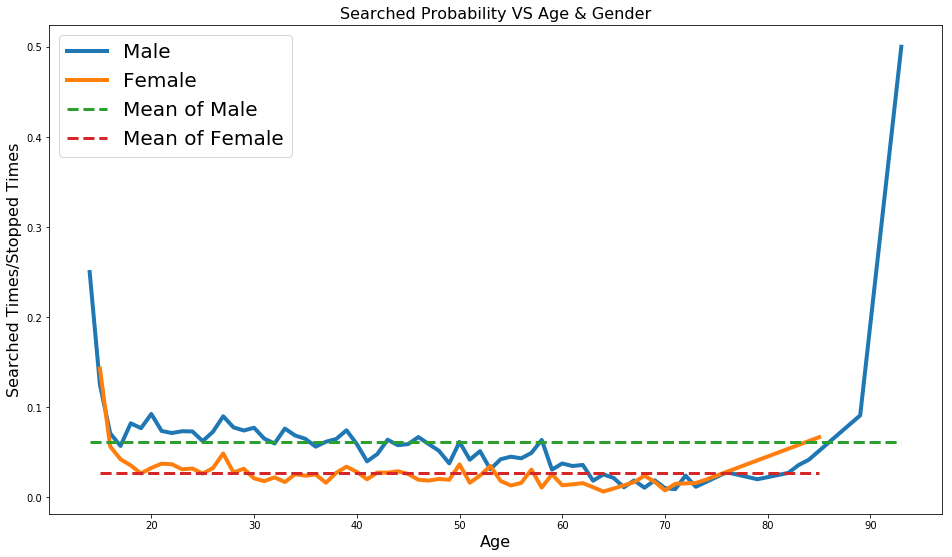

In [11]:
#Draw the distribution of searched probabilty in terms of age and gender.
ags.plot('ratio')

Now we can see the probability of being searched when stopped. How ever there are some special cases that are unhelpful for us to go to conclusion:
   - People at age of like 15 are not allowed to drive, when stopped, they are very likely to be stopped. There are only 3 people under 16 (legally driving age) in our dataset, and one of them is searched.
   - People who are very old are more likely to be searched too. There are 2 people over 90 stopped are one of them being searched.

So let's zoom in the picture and focus on the age of 20~90.

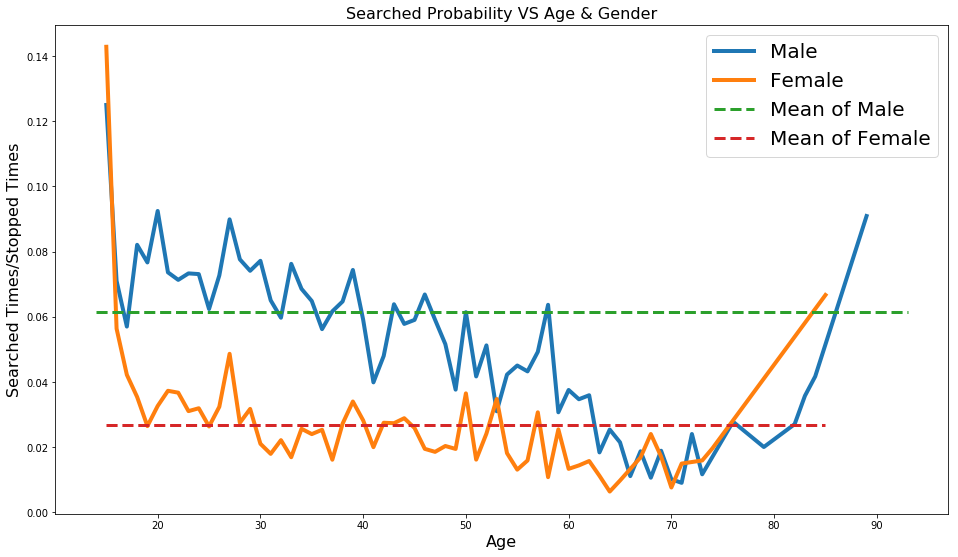

In [12]:
#Draw the distribution of searched probabilty in terms of age and gender.
ags.plot('ratio',zoom='y')

After seeing the chart above, we can make some conclusions:
  - Men are more likely to be searched, about two times as much as the women. But both the probabilities are very low.
  - Older people are less likely to be searched than the young. But the decrement of the probabilities is tiny.

### Part 4: Race distribution of arrest

In this part we will focus on the race distribution of subjects who were arrested.And also,we are interested in the ratio of arrested for each race.

First,by analyzing race of arrested subjects, we come out with this pie chart,which shows the race distribution of subjects who were arrested. 

Text(0.5, 1.0, 'race distribution in arrested subjects')

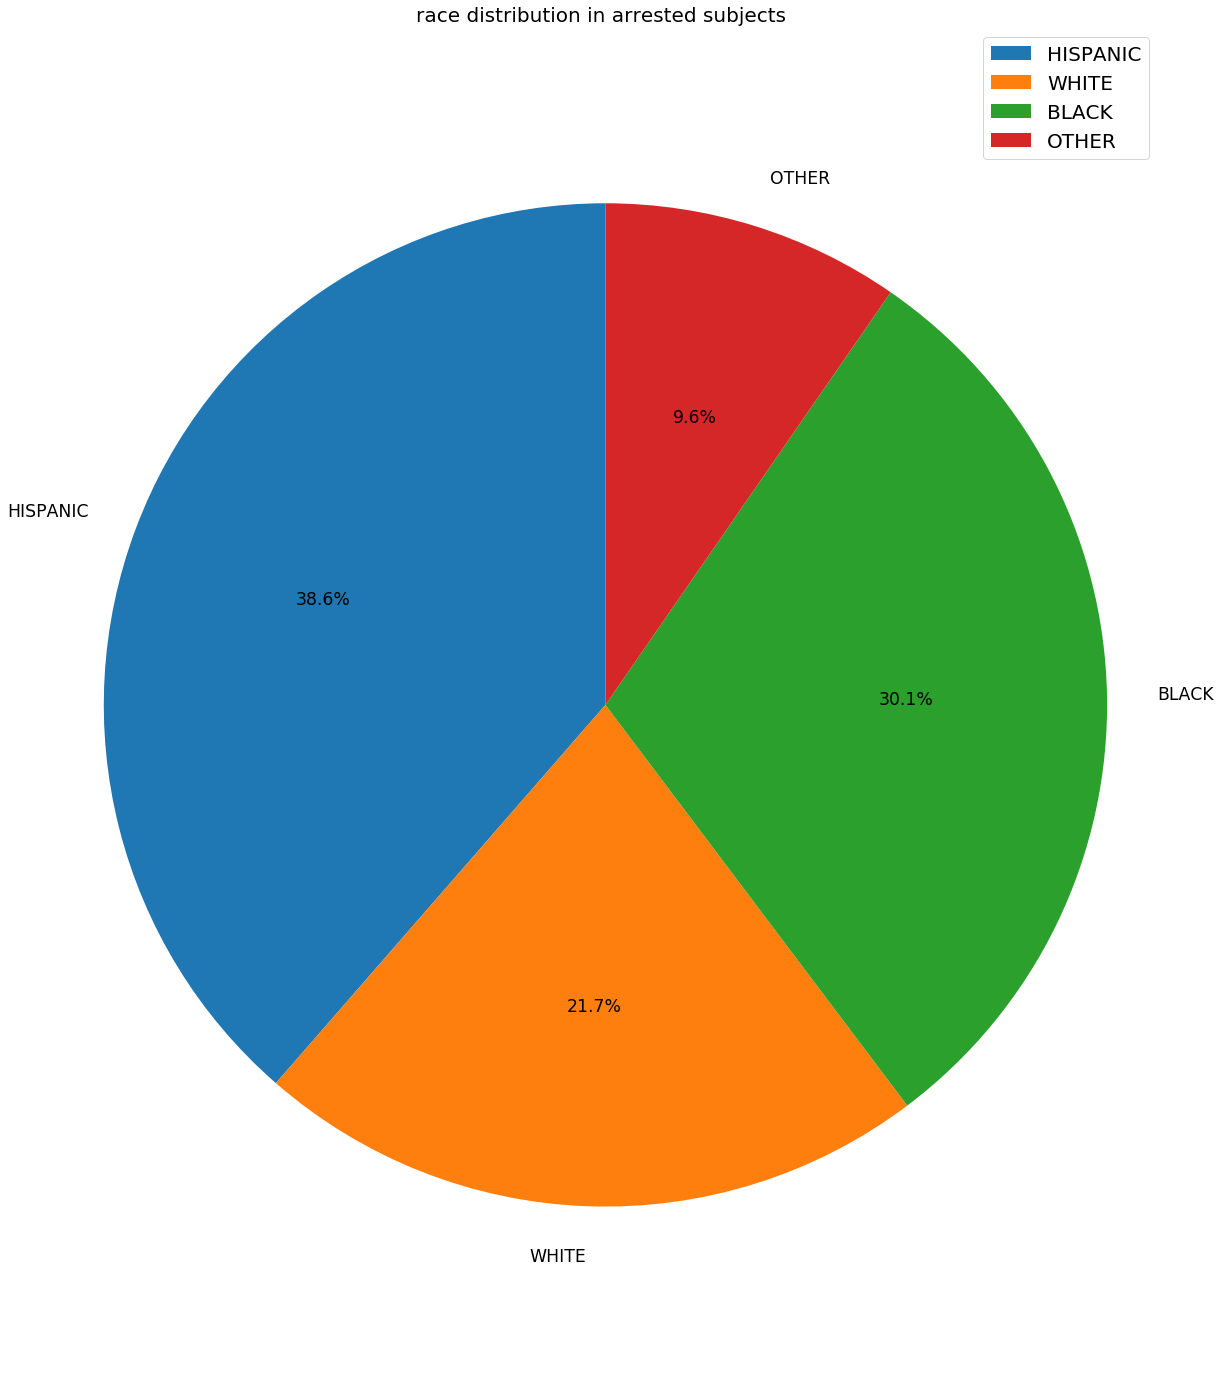

In [13]:
#draw the pie chart of race distribution in arrested subjects
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import race_arrest_correlation as rap
labels=['HISPANIC','WHITE','BLACK','OTHER']
plt.figure(figsize=(20,25))
patches,l_text,p_text=plt.pie(rap.sizes, labels=labels, 
        autopct='%1.1f%%', shadow=False, startangle=90)
proptease = fm.FontProperties()
proptease.set_size('xx-large')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(l_text, fontproperties=proptease)
plt.setp(p_text, fontproperties=proptease)

plt.axis('equal')
plt.legend(fontsize=20,loc=1)
plt.title("race distribution in arrested subjects",fontsize=20)

We can observe that arrested subjects mainly consist of Hispanic,White,and Black,which is consistant with San Diego's ethnic composition.And also,there are many other races including Aisan,Pacific islander,Indian,etc.

And this is the pie chart of the ethnic and racial breakdown of San Diego. We used the 2017 census data for this from: 

https://www.census.gov/quickfacts/fact/table/sandiegocountycalifornia,ca/PST045217

Text(0.5, 1.0, 'race distribution in San Diego 2017')

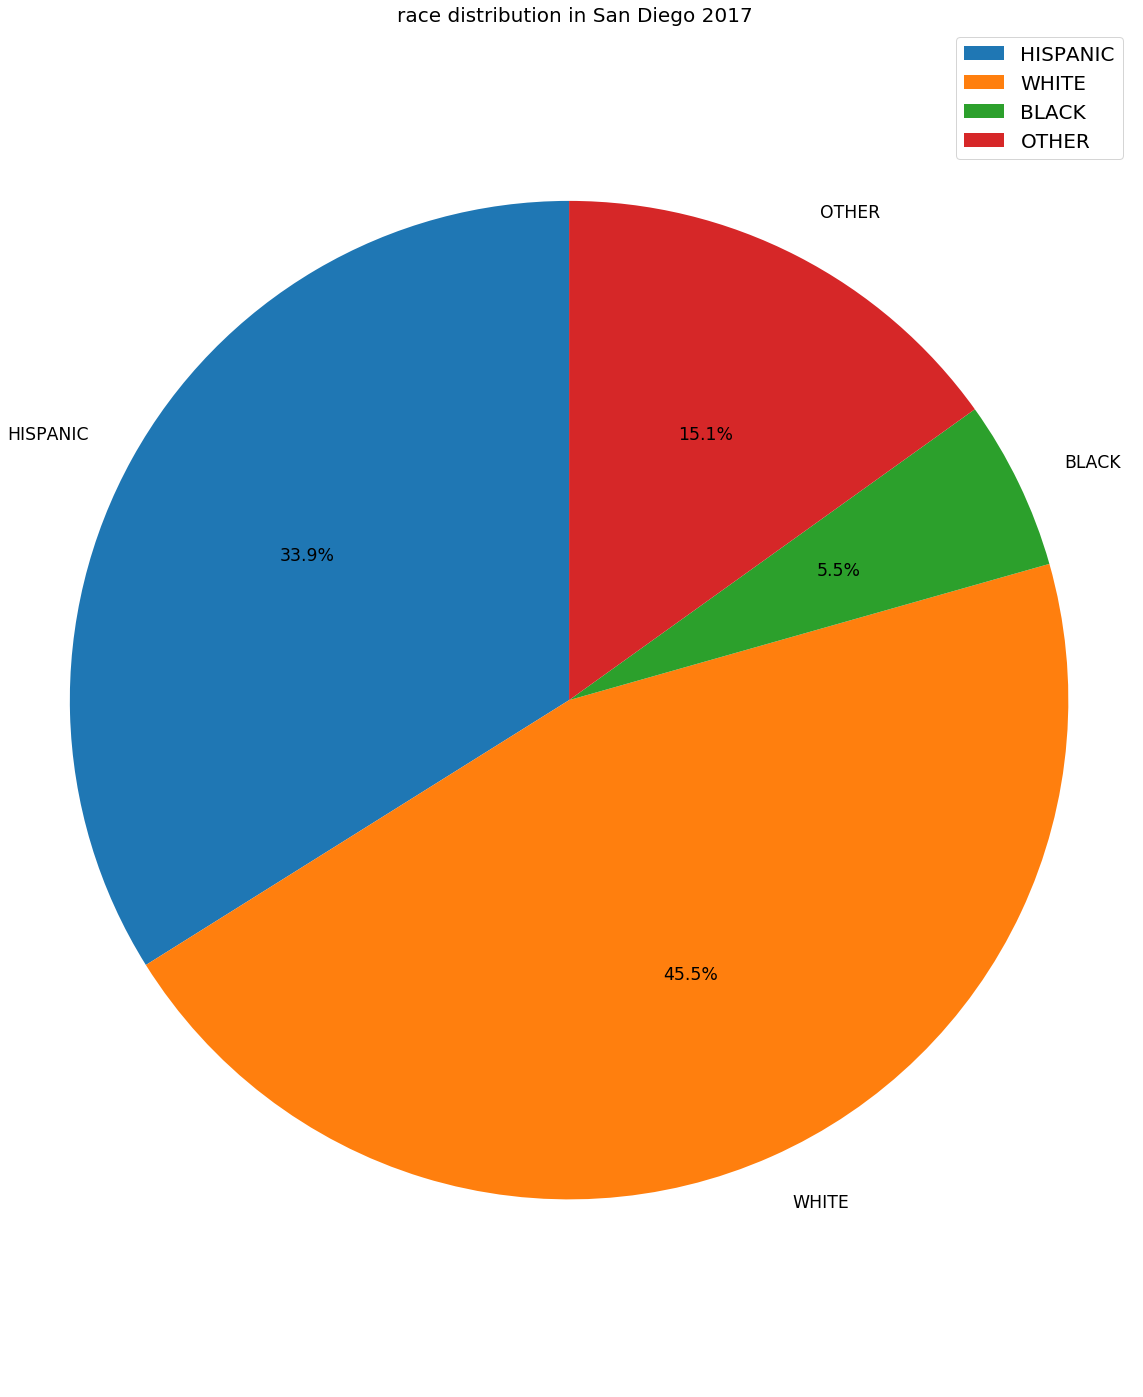

In [14]:
#draw the race distribution in San Diego 2017
labels=['HISPANIC','WHITE','BLACK','OTHER']
sizes=[33.9,45.5,5.5,15.1]
plt.figure(figsize=(20,25))
patches,l_text,p_text=plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=False, startangle=90)
proptease = fm.FontProperties()
proptease.set_size('xx-large')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(l_text, fontproperties=proptease)
plt.setp(p_text, fontproperties=proptease)

plt.axis('equal')
plt.legend(fontsize=20,loc=1)
plt.title("race distribution in San Diego 2017",fontsize=20)


By comparing it with the race distribution of arrested subjects, we can find that they are not proportional.